In [1]:
import pandas as pd
import numpy as np


In [85]:
data = pd.read_csv("./Hitters.csv")
data = data.loc[data["Salary"].notna()]
data = pd.get_dummies(data)

In [86]:
y = data["Salary"]
x = data.drop(columns=["Salary"])

# Lasso

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=42)


In [88]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=2)
clf.fit(X_train, y_train )
print(clf.coef_)
print(clf.intercept_)


[-1.30836501e+00  7.90794691e+00  9.62493280e+00 -2.88548039e+00
 -3.68760444e+00  4.10732351e+00  2.09406891e+01 -3.49787366e-01
  4.92337153e-01  6.34562155e-01  1.76643485e+00  4.68339123e-01
 -7.70164974e-01  2.81406464e-01  3.39570004e-01 -1.15565921e+00
 -7.63449312e+01  2.12557124e-13  8.24467791e+01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
-60.49363057614619


/home/brami/env2/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5946713.8047977835, tolerance: 3236.3996750106994
  model = cd_fast.enet_coordinate_descent(


In [20]:
y_pred = clf.predict(x)

In [21]:
from sklearn.metrics import accuracy_score
clf.score(X_test, y_test)


0.3416033808436393

In [22]:
y_valuate = y.to_numpy().reshape(-1, 1)

In [9]:
print("""
>>> from sklearn import svm, datasets
>>> from sklearn.model_selection import GridSearchCV
>>> iris = datasets.load_iris()
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
>>> svc = svm.SVC()
>>> clf = GridSearchCV(svc, parameters)
>>> clf.fit(iris.data, iris.target)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
>>> sorted(clf.cv_results_.keys())
['mean_fit_time', 'mean_score_time', 'mean_test_score',...
 'param_C', 'param_kernel', 'params',...
 'rank_test_score', 'split0_test_score',...
 'split2_test_score', ...
 'std_fit_time', 'std_score_time', 'std_test_score']
""".replace(">>> ",""))


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())
['mean_fit_time', 'mean_score_time', 'mean_test_score',...
 'param_C', 'param_kernel', 'params',...
 'rank_test_score', 'split0_test_score',...
 'split2_test_score', ...
 'std_fit_time', 'std_score_time', 'std_test_score']



In [9]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = data
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x, y)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/brami/env2/lib/python3.8/site-packages/sklearn/svm/_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "/home/brami/env2/lib/python3.8/site-packages/sklearn/svm/_base.py", line 544, in _validate_targets
    check_classification_targets(y)
  File "/home/brami/env2/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/br

ValueError: Unknown label type: 'continuous'

In [25]:
pd.get_dummies(data)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,700.0,0,1,1,0,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,875.0,1,0,1,0,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,385.0,1,0,0,1,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,1314,131,12,960.0,1,0,1,0,1,0


In [26]:
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [49]:
type(y).shape, type(y)_pred

(method, numpy.ndarray)

In [30]:
import tensorflow as tf

In [31]:
tf.one_hot(
    indices, depth, on_value=None, off_value=None, axis=None, dtype=None, name=None
)


NameError: name 'indices' is not defined

In [29]:
!pip install tensorflow

  Using cached tensorflow-2.3.1-cp38-cp38-manylinux2010_x86_64.whl (320.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Processing /home/brami/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73/wrapt-1.12.1-cp38-cp38-linux_x86_64.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached numpy-1.18.5-cp38-cp38-manylinux1_x86_64.whl (20.6 MB)
     |████████████████████████████████| 3.8 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 1.9 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-2.10.0-cp38-cp38-manylinux1_x86_64.whl (2.9 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
Processing /home/brami/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c5

# Ridge

In [41]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge_reg = linear_model.Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': list(X_train.columns), 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 20000, 10):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
#ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()
ridge_df = ridge_df.set_index('variable').T.reset_index()

<ipython-input-42-2d02335605f0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 5))


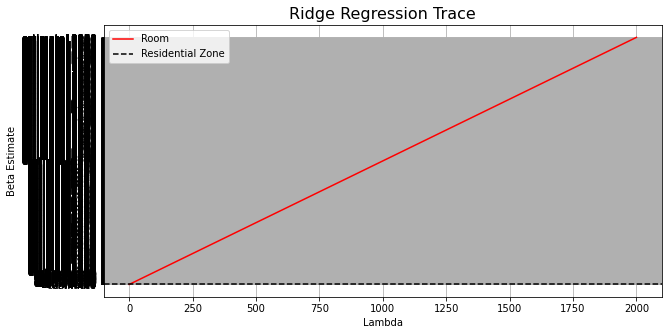

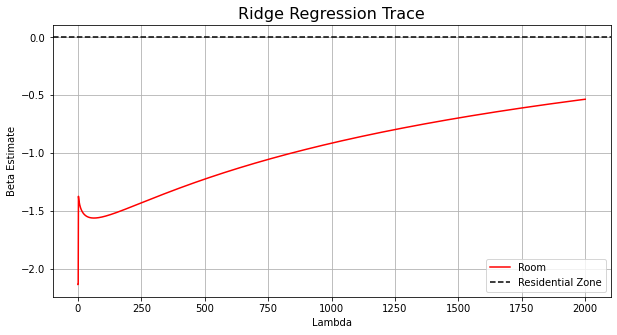

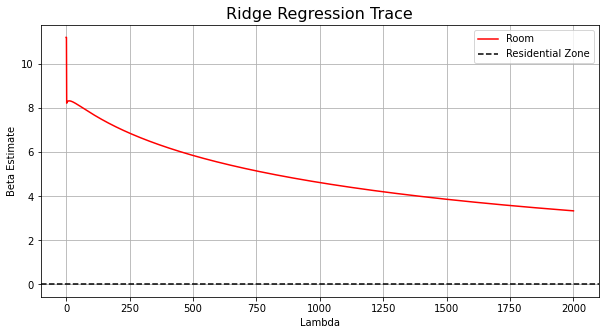

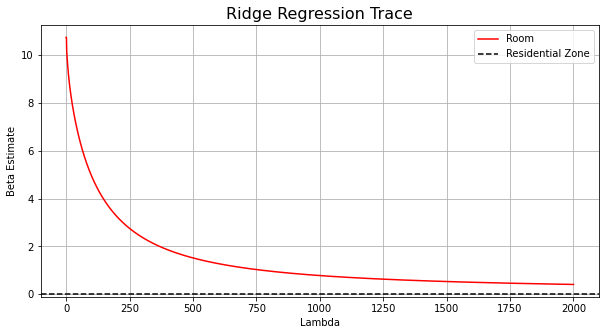

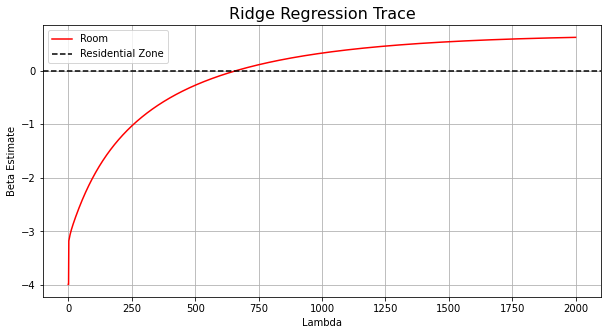

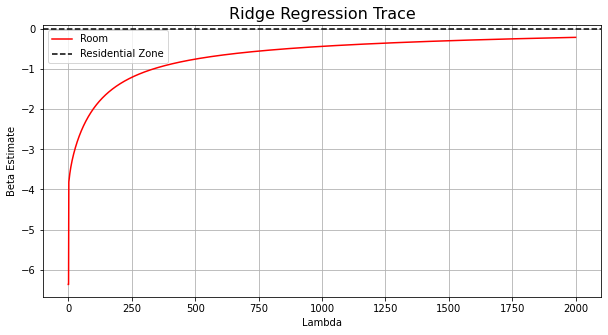

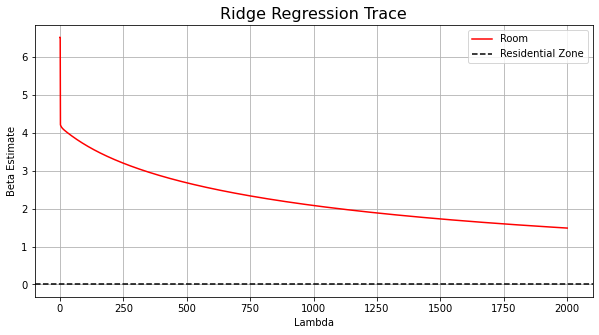

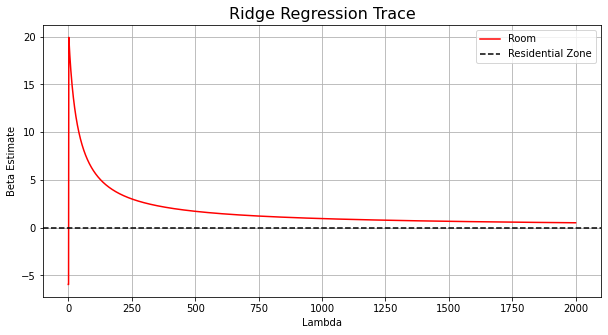

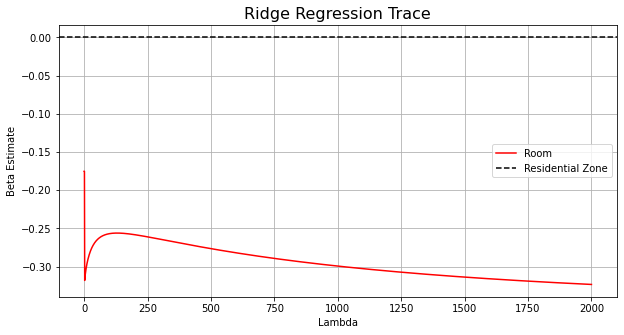

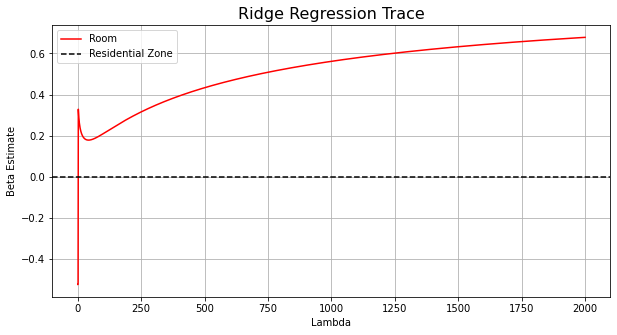

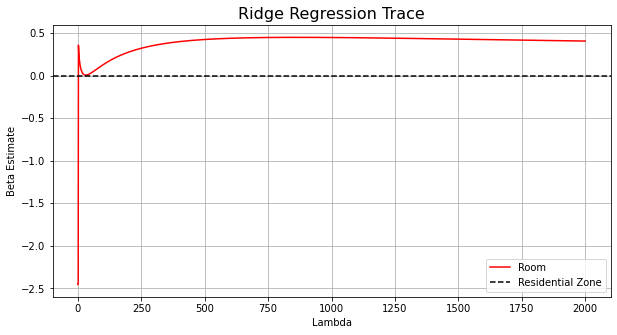

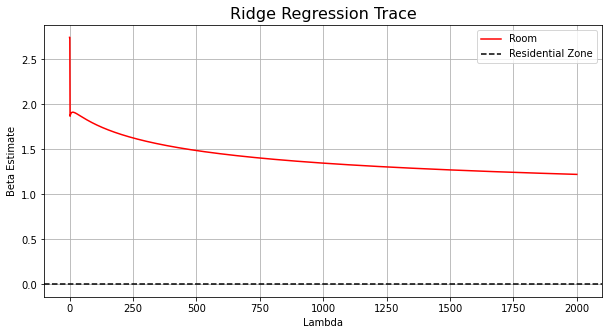

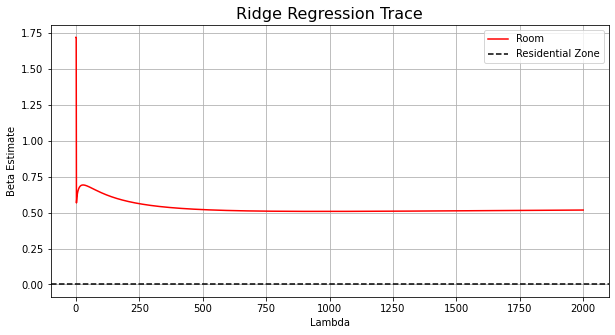

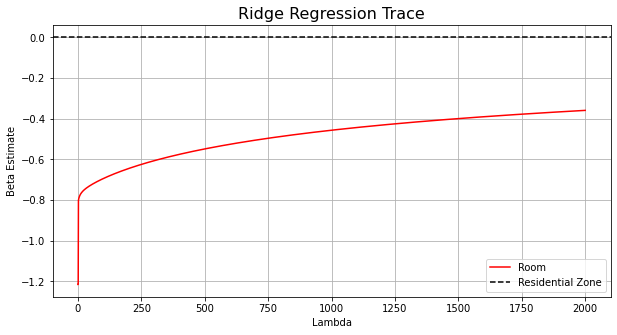

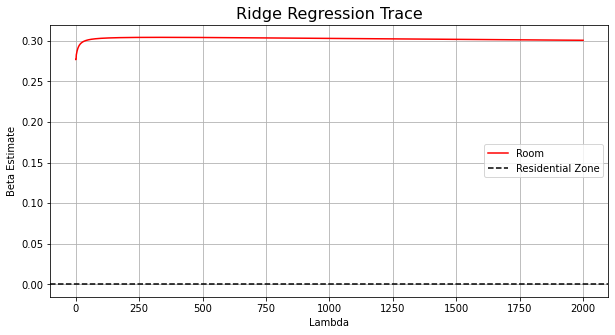

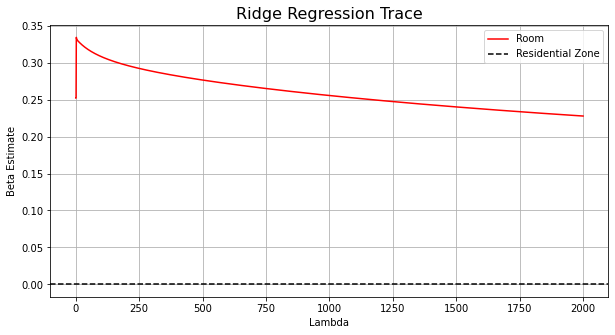

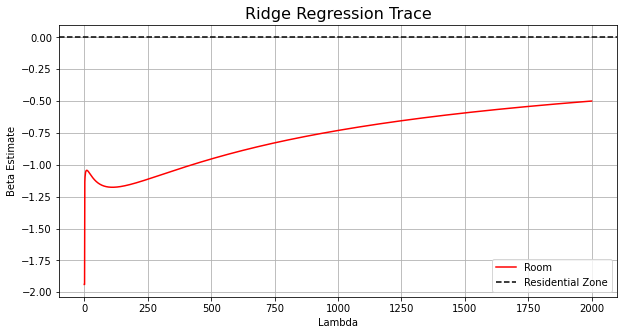

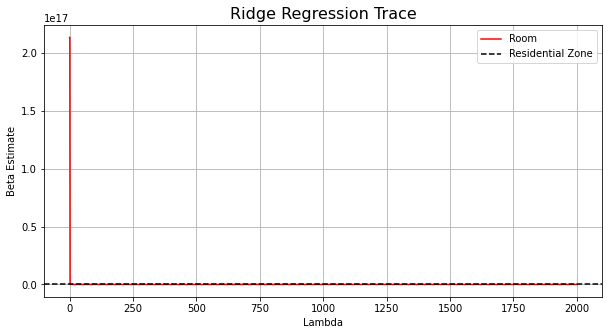

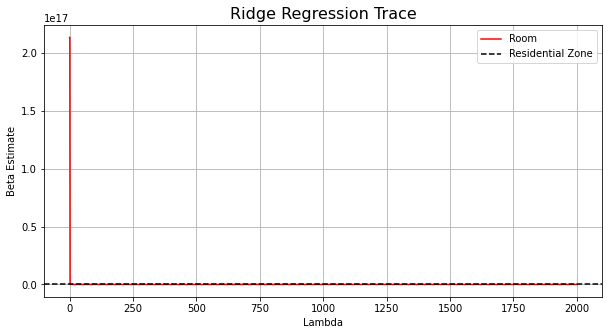

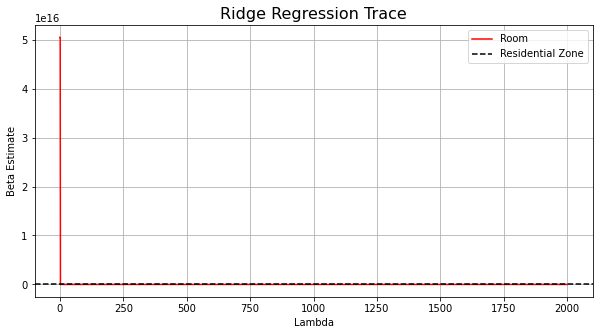

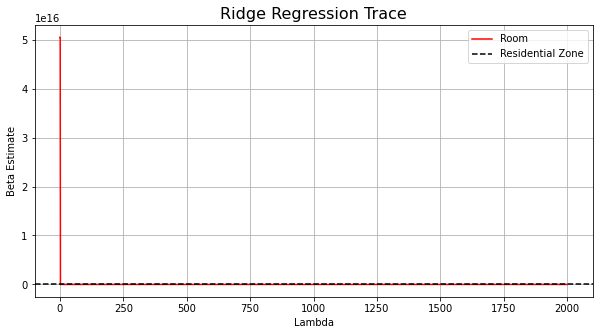

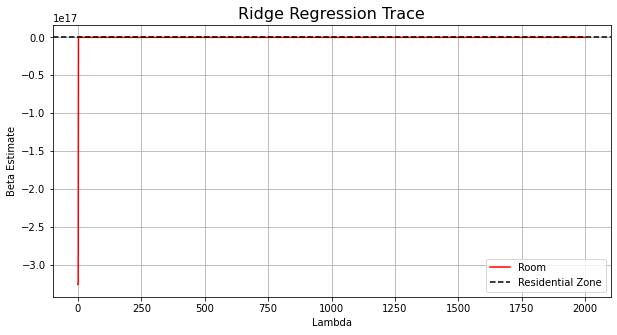

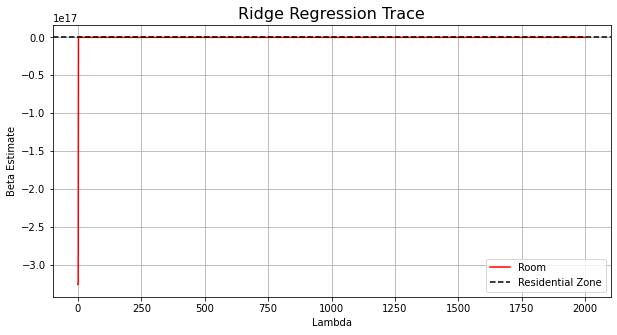

In [42]:
for i in list(ridge_df.columns):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ridge_df[i], 'r')

    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Beta Estimate")
    ax.set_title("Ridge Regression Trace", fontsize=16)
    ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
    ax.grid(True)


In [46]:
import statsmodels.api as sm
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     14.18
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           3.86e-25
Time:                        11:32:17   Log-Likelihood:                -1228.2
No. Observations:                 176   AIC:                             2496.
Df Residuals:                     156   BIC:                             2560.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AtBat          -1.3429      0.735     -1.827      

In [47]:
ols_pred = olsres.predict(X_test)

Text(0, 0.5, 'MSE')

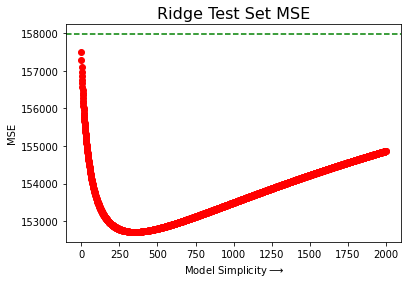

In [48]:
# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

# plot mse
plt.plot(ridge_mse_test[1:], 'ro')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")


In [49]:
ridge_df

variable,index,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,estimate,-2.133585,11.215733,10.744645,-3.990416,-6.368440,6.523950,-5.952003,-0.175236,-0.525219,...,-1.214818,0.277008,0.252084,-1.938635,2.136941e+17,2.136941e+17,5.045745e+16,5.045745e+16,-3.261933e+17,-3.261933e+17
1,estimate0,-2.133585,11.215733,10.744645,-3.990416,-6.368440,6.523950,-5.952003,-0.175236,-0.525219,...,-1.214818,0.277008,0.252084,-1.938635,2.136941e+17,2.136941e+17,5.045745e+16,5.045745e+16,-3.261933e+17,-3.261933e+17
2,estimate10,-1.372544,8.227779,10.181236,-3.177169,-3.814985,4.213680,19.933869,-0.318056,0.328420,...,-0.800926,0.282741,0.334073,-1.135238,-3.357768e+01,3.357768e+01,4.044901e+01,-4.044901e+01,-5.463256e+00,5.463256e+00
3,estimate20,-1.393261,8.262249,10.000684,-3.151870,-3.756025,4.195192,19.409905,-0.314003,0.304209,...,-0.794083,0.284453,0.332311,-1.092109,-2.780890e+01,2.780890e+01,3.641931e+01,-3.641931e+01,-8.751686e+00,8.751686e+00
4,estimate30,-1.409717,8.284358,9.834324,-3.126328,-3.700003,4.179943,18.917409,-0.310859,0.286814,...,-0.789103,0.286032,0.331372,-1.070580,-2.439863e+01,2.439863e+01,3.311509e+01,-3.311509e+01,-9.993221e+00,9.993221e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,estimate19950,-0.535528,3.344697,0.410632,0.620848,-0.206165,1.489945,0.510138,-0.323249,0.678281,...,-0.359292,0.300680,0.227783,-0.500376,-1.423589e-01,1.423589e-01,1.907654e-01,-1.907654e-01,-1.110365e-01,1.110365e-01
1997,estimate19960,-0.535245,3.343804,0.410451,0.620944,-0.206030,1.489537,0.509903,-0.323265,0.678356,...,-0.359223,0.300678,0.227761,-0.500220,-1.422839e-01,1.422839e-01,1.906744e-01,-1.906744e-01,-1.109773e-01,1.109773e-01
1998,estimate19970,-0.534963,3.342911,0.410271,0.621040,-0.205894,1.489129,0.509669,-0.323281,0.678431,...,-0.359153,0.300677,0.227739,-0.500063,-1.422090e-01,1.422090e-01,1.905836e-01,-1.905836e-01,-1.109181e-01,1.109181e-01
1999,estimate19980,-0.534680,3.342019,0.410091,0.621135,-0.205759,1.488722,0.509435,-0.323297,0.678506,...,-0.359084,0.300675,0.227716,-0.499907,-1.421341e-01,1.421341e-01,1.904928e-01,-1.904928e-01,-1.108590e-01,1.108590e-01


In [68]:
ridge_reg = linear_model.Ridge(alpha=25000)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=25000)

In [70]:
ridge_reg.score(X_test, y_test)

0.3528624062326976

# Example

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error


house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)


In [112]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()


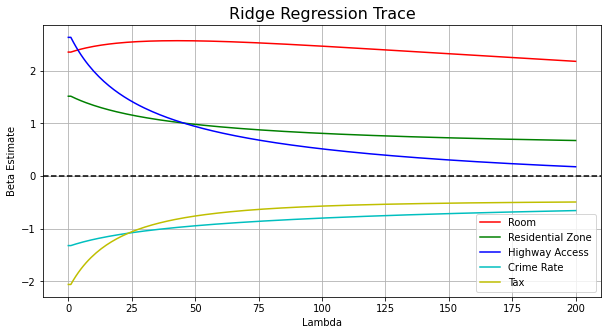

In [113]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)


Text(0, 0.5, 'MSE')

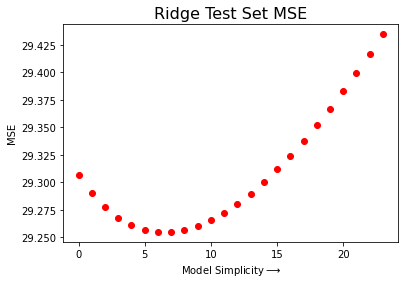

In [117]:
# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
#ols_mse = mean_squared_error(y_test, ols_pred)

# plot mse
plt.plot(ridge_mse_test[1:25], 'ro')
#plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")


In [115]:
ridge_reg = Ridge(alpha=200)
ridge_reg.fit(X_train, y_train)
var_name = 'estimate' + str(alpha)
#ridge_df[var_name] = ridge_reg.coef_
# prediction
ridge_train_pred.append(ridge_reg.predict(X_train))
ridge_test_pred.append(ridge_reg.predict(X_test))


In [106]:
mean_squared_error(y_test,ridge_test_pred[0])

29.326596526123275